# download data for cloud

In [88]:
from download_file import *

In [2]:
url = "https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip"
download_dir = '..//..//datasets_collection//Traffic_Sign_Classifier'
maybe_download_and_extract(url, download_dir)

- Download progress: 100.0%
Download finished. Extracting files.
Done.


# importing some useful packages

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import cv2
import time as time
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
import time
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

D:\Anaconda_36\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read data

In [30]:
def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

In [3]:
def read_data_sets(file):
    """
    Load pickled data
    args:
        file   (str)     path to datasets 
    yields:
        features and label of datasets (numpy array)
    """
    with open(file, mode='rb') as f:
        return pickle.load(f)

In [4]:
# Load pickled data
import pickle

data_rel_path = "..\\..\\datasets_collection\\Traffic_Sign_Classifier"
#"aug_train_600"

train = read_data_sets(os.path.join(data_rel_path, "train.p"))
valid= read_data_sets(os.path.join(data_rel_path, "valid.p")) 
test = read_data_sets(os.path.join(data_rel_path, "test.p")) 

    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)
labels_valid = OHE_labels(y_valid,43)

In [5]:
def check_OHE(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct, ok to proceed')
    else:
        print('One hot encoding doesnt match the output, check code!!!')

In [6]:
data_pd = pd.read_csv(os.path.join(data_rel_path, 'signnames.csv'))

In [7]:
check_OHE(labels_test,y_test)
check_OHE(labels_train,y_train)

One hot encoding correct, ok to proceed
One hot encoding correct, ok to proceed


# Dataset Exploration

## Dataset Summary

In [8]:
n_train = len(y_train)
n_test = len(y_test)
image_shape = np.shape(X_train[1])
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Exploratory Visualization

In [9]:
def plot_random_3C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
def plot_random_1C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot],cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()   
def plot_random_preprocess(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(pre_process_image(X[ind_plot]),cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()

### original images

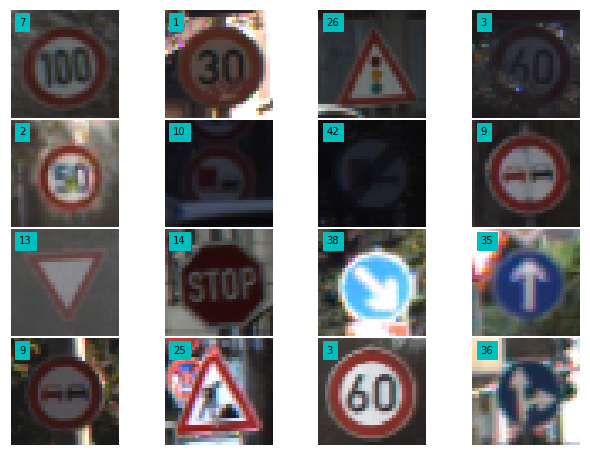

In [10]:
plot_random_3C(4,4,X_train,y_train)

### images after equalization 

In [11]:
def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    return image

In [12]:
img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize

image_GS_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
image_GS_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)

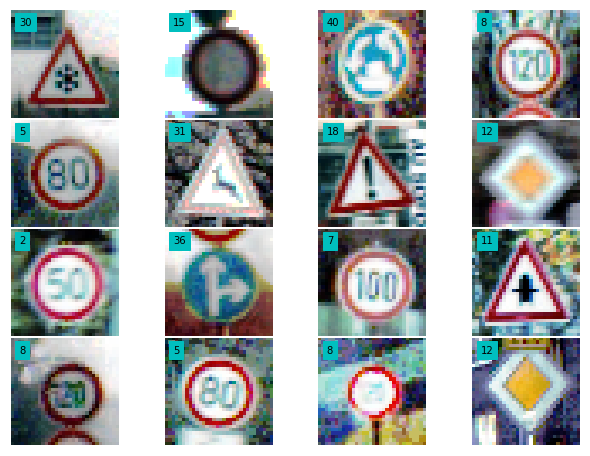

In [13]:
plot_random_3C(4,4,image_GS_train+.5,y_train)

### frequency table of training set

In [14]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_i_sorted = sorted(data_i, key=lambda x: x[1])

In [15]:
data_pd['Occurance'] = pd.Series(np.asarray(data_i_sorted).T[1], index=np.asarray(data_i_sorted).T[0])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0])
data_pd_sorted = data_pd_sorted.reindex(data_pd_sorted["ClassId"])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0])
data_pd_sorted = data_pd_sorted.drop(['ClassId'], axis = 1)

In [16]:
data_pd_sorted.head(10)

,SignName,Occurance
2,Speed limit (50km/h),2250
1,Speed limit (30km/h),2220
13,Yield,2160
12,Priority road,2100
38,Keep right,2070
10,No passing for vehicles over 3.5 metric tons,2010
4,Speed limit (70km/h),1980
5,Speed limit (80km/h),1860
25,Road work,1500
9,No passing,1470


In [17]:
data_pd_sorted.tail(10)

,SignName,Occurance
39,Keep left,300
29,Bicycles crossing,270
24,Road narrows on the right,270
41,End of no passing,240
42,End of no passing by vehicles over 3.5 metric ...,240
32,End of all speed and passing limits,240
27,Pedestrians,240
37,Go straight or left,210
19,Dangerous curve to the left,210
0,Speed limit (20km/h),210


<Container object of 43 artists>

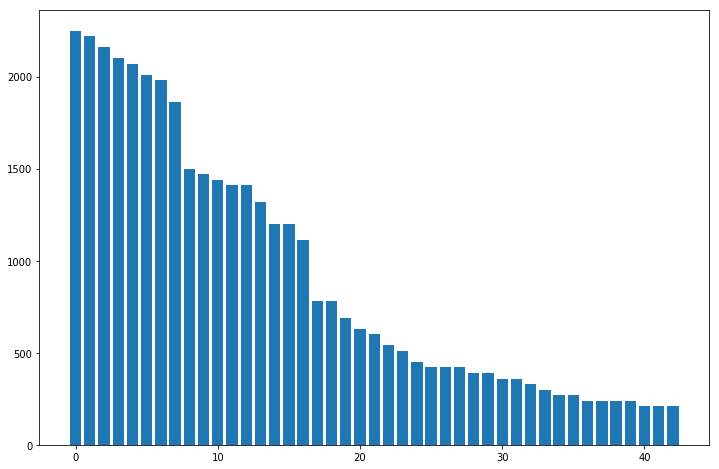

In [18]:
plt.figure(figsize=(12,8))
plt.bar(range(43),height=data_pd_sorted["Occurance"])

# Design and Test a Model Architecture

## Preprocessing

### histogram equalization: 
* reason: The contrast of brightness will be enhanced. Therefore the features will stand out.

In [19]:
img_size = 30

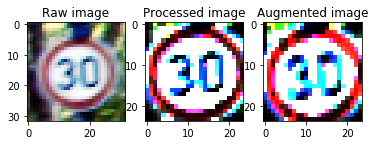

Final image size is (24, 24, 3)


In [20]:
#Some useful image functions
  
def show3img(img, img1, img2):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Raw image")
    plt.subplot(1, 3, 2)
    plt.imshow(img1)
    plt.title("Processed image")
    plt.subplot(1, 3, 3)
    plt.imshow(img2)
    plt.title("Augmented image")
    plt.show()
    
def eq_Hist(img):
    #Histogram Equalization
    img2=img.copy() 
    img2[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img2

def scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    c_x,c_y, sh = int(img2.shape[0]/2), int(img2.shape[1]/2), int(img_size/2)
    return img2

def crop(img, mar=0):
    c_x,c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(img_size/2-mar)
    return img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]

def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)
#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def transform_img(img):
    img2=sharpen_img(img)
    img2=crop(img2,3)
    img2=contr_img(img2, 1.5)
    return eq_Hist(img2)

def augment_img(img):
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=rotate_img(img)
    img=scale_img(img)
    return transform_img(img)

x_selected = X_train[y_train == 1]
im=x_selected[60, :, :, :]
imp=contr_img(im, 0.5)

show3img(im, transform_img(im), augment_img(im))
print("Final image size is", transform_img(im).shape)

### normalization: 
* reason: improve learninig speed
* method: scaled images between -.5 and .5, by dividing by 255. and subtracting .5.

In [21]:
X_train_norm = X_train/255.
X_test_norm = X_test/255.
X_valid_norm = X_valid/255.

In [22]:
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)
labels_valid = OHE_labels(y_valid,43)

In [23]:
labels_valid.shape

(4410, 43)

### data augmentation: 

* Because of limited data and the class imbalance, additional data was generated by affine transformation including 
    1. **rotation** with random number generated between +/- 40 degress
    2. **translation** by +/- 10 pixels along vertical and horizontal direction
    3. **shearing**

In [78]:
Image_train_GS_rot, y_train_rot, labels_train_rot = gen_transformed_data(X_train, y_train, 43, 10, 30, 5, 5, 1)

## Model

### Shuffling and partition

In [24]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    # batch_shuffle = tf.train.shuffle_batch([data_input], enqueue_many=True, batch_size=10, capacity=100, min_after_dequeue=10, allow_smaller_final_batch=True)
    
    np.random.seed(seed)
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.ceil(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch = [mini_batch_X, mini_batch_Y]
        mini_batches.append(mini_batch)
    
    return mini_batches

In [25]:
mini_batch_size = 64
mini_batches = random_mini_batches(X_train_norm, labels_train, mini_batch_size)
print("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 

shape of the 1st mini_batch_X: (64, 32, 32, 3)
shape of the 2nd mini_batch_X: (64, 32, 32, 3)
shape of the 1st mini_batch_Y: (64, 43)
shape of the 2nd mini_batch_Y: (64, 43)


## Model Architechture

### Create placeholders

In [26]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """
    X = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape=[None, n_y])
    return X, Y

### Initialize parameters

In [27]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow.
    
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    layer_depth = {
        'conv1': 32,
        'conv2': 128,
        'fc1': 2048,
        'fc2': 1024,
        'fc3': n_classes
    }

    filter_size={
        'conv_1': 3
        ,'conv_2': 3
    }
    
    tf.set_random_seed(1)                             

    weights = {
        'conv1': tf.get_variable("conv1w", shape=[filter_size['conv_1'], filter_size['conv_1'], 3, layer_depth['conv1']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'conv2': tf.get_variable("conv2w", shape=[filter_size['conv_2'], filter_size['conv_2'], layer_depth['conv1'], layer_depth['conv2']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'fc1':  tf.get_variable("fc1w", shape=[8192, layer_depth['fc1']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'fc2':  tf.get_variable("fc2w", shape=[layer_depth['fc1'], layer_depth['fc2']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'fc3':  tf.get_variable("fc3w", shape=[layer_depth['fc2'], layer_depth['fc3']], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    }

    biases = {
        'conv1': tf.get_variable("conv1b", shape=[layer_depth['conv1']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'conv2': tf.get_variable("conv2b", shape=[layer_depth['conv2']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'fc1': tf.get_variable("fc1b", shape=[layer_depth['fc1']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'fc2': tf.get_variable("fc2b", shape=[layer_depth['fc2']], initializer=tf.contrib.layers.xavier_initializer(seed = 0)),
        'fc3': tf.get_variable("fc3b", shape=[layer_depth['fc3']], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    }
    
    
    parameters = {"weights": weights,
                  "biases": biases}
    
    return parameters

### Forward propagation

In **TensorFlow**, there are built-in functions that carry out the convolution steps.

`tf.nn.conv2d(X,W1, strides = [1,s,s,1], padding = 'SAME')`: given an input $X$ and a group of filters $W1$, this function convolves $W1$'s filters on X. The third input ([1,f,f,1]) represents the strides for each dimension of the input (m, n_H_prev, n_W_prev, n_C_prev).

`tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME')`: given an input A, this function uses a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.

`tf.nn.relu(Z1)`: computes the elementwise ReLU of Z1 (which can be any shape).

`tf.contrib.layers.flatten(P)`: given an input P, this function flattens each example into a 1D vector it while maintaining the batch-size. It returns a flattened tensor with shape [batch_size, k].

`tf.contrib.layers.fully_connected(F, num_outputs)`: given a the flattened input F, it returns the output computed using a fully connected layer.

In [28]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    weights = parameters['weights']
    biases = parameters['biases']

    stride = {
        'conv_1': 1
        ,'conv_2': 1
        ,'maxpool_1': 2
        ,'maxpool_2': 2
    }
    
    kernel_size={
        'maxpool_1': 2
        ,'maxpool_2': 2
    }
    
    # CONV2D: stride of 1, padding 'SAME'
    # tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, name=None)
    Z1 = tf.nn.conv2d(X,weights["conv1"], strides = [1,stride["conv_1"],stride["conv_1"],1], padding = 'SAME', name="Conv_1")
    # RELU
    A1 = tf.nn.relu(Z1, name="Relu_1")
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,kernel_size["maxpool_1"],kernel_size["maxpool_1"],1], strides = [1,stride["maxpool_1"],stride["maxpool_1"],1], padding = 'SAME', name="Maxpool_1")
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1,weights["conv2"], strides = [1,stride["conv_2"],stride["conv_2"],1], padding = 'SAME', name="Conv_2")
    # RELU
    A2 = tf.nn.relu(Z2, name="Relu_2")
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,kernel_size["maxpool_2"],kernel_size["maxpool_2"],1], strides= [1,stride["maxpool_2"],stride["maxpool_2"],1], padding = 'SAME', name="Maxpool_2")
    # FLATTEN
    FLAT_2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 43 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    print (FLAT_2)
    FC3 = tf.nn.xw_plus_b(FLAT_2, weights['fc1'], biases['fc1'])
    Z3 = tf.nn.relu(FC3)
    # FULLY-CONNECTED
    FC4 = tf.nn.xw_plus_b(FC3, weights['fc2'], biases['fc2'])
    Z4 = tf.nn.relu(FC4)
    # FULLY-CONNECTED
    FC5 = tf.nn.xw_plus_b(FC4, weights['fc3'], biases['fc3'])
    
    print (A1)
    print (P1)
    print (A2)
    print (P2)
    print (FLAT_2)
    print (Z3)
    print (Z4)
    print (FC5)
    
#     Z3 = tf.contrib.layers.fully_connected(P2, 43, activation_fn=None)

    return FC5

In [29]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(32, 32, 3, 4)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,32,32,3), Y: np.random.randn(2,4)})
    print (Z3.get_shape()[1])
#     print("Z3 = " + str(a))

Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("Relu_1:0", shape=(?, 32, 32, 32), dtype=float32)
Tensor("Maxpool_1:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("Relu_2:0", shape=(?, 16, 16, 128), dtype=float32)
Tensor("Maxpool_2:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("Relu:0", shape=(?, 2048), dtype=float32)
Tensor("Relu_3:0", shape=(?, 1024), dtype=float32)
Tensor("xw_plus_b_2:0", shape=(?, 43), dtype=float32)
43


## Compute cost

In [31]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y)
    cost = tf.reduce_mean(cost)
    
    return cost

In [32]:
from tensorflow.python.framework import ops

In [33]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 3, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z5 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z5, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            print ("epoch: "+str(epoch))
            
            i = 0
            for minibatch in minibatches:
                i+=1
                print ("batch: "+str(i)+"/"+str(len(minibatches)))
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z5, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

In [ ]:
train_accuracy, test_accuracy, parameters = model(X_train_norm, labels_train, X_test_norm, labels_test)

Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("Relu_1:0", shape=(?, 32, 32, 32), dtype=float32)
Tensor("Maxpool_1:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("Relu_2:0", shape=(?, 16, 16, 128), dtype=float32)
Tensor("Maxpool_2:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("Relu:0", shape=(?, 2048), dtype=float32)
Tensor("Relu_3:0", shape=(?, 1024), dtype=float32)
Tensor("xw_plus_b_2:0", shape=(?, 43), dtype=float32)
epoch: 0
batch: 1/613
batch: 2/613
batch: 3/613
batch: 4/613
batch: 5/613
batch: 6/613
batch: 7/613
batch: 8/613
batch: 9/613
batch: 10/613
batch: 11/613
batch: 12/613
batch: 13/613
batch: 14/613
batch: 15/613
batch: 16/613
batch: 17/613
batch: 18/613
batch: 19/613
batch: 20/613
batch: 21/613
batch: 22/613
batch: 23/613
batch: 24/613
batch: 25/613
batch: 26/613
batch: 27/613
batch: 28/613
batch: 29/613
batch: 30/613
batch: 31/613
batch: 32/613
batch: 33/613
batch: 34/613


batch: 519/613
batch: 520/613
batch: 521/613
batch: 522/613
batch: 523/613
batch: 524/613
batch: 525/613
batch: 526/613
batch: 527/613
batch: 528/613
batch: 529/613
batch: 530/613
batch: 531/613
batch: 532/613
batch: 533/613
batch: 534/613
batch: 535/613
batch: 536/613
batch: 537/613
batch: 538/613
batch: 539/613
batch: 540/613
batch: 541/613
batch: 542/613
batch: 543/613
batch: 544/613
batch: 545/613
batch: 546/613
batch: 547/613
batch: 548/613
batch: 549/613
batch: 550/613
batch: 551/613
batch: 552/613
batch: 553/613
batch: 554/613
batch: 555/613
batch: 556/613
batch: 557/613
batch: 558/613
batch: 559/613
batch: 560/613
batch: 561/613
batch: 562/613
batch: 563/613
batch: 564/613
batch: 565/613
batch: 566/613
batch: 567/613
batch: 568/613
batch: 569/613
batch: 570/613
batch: 571/613
batch: 572/613
batch: 573/613
batch: 574/613
batch: 575/613
batch: 576/613
batch: 577/613
batch: 578/613
batch: 579/613
batch: 580/613
batch: 581/613
batch: 582/613
batch: 583/613
batch: 584/613
batch: 585

batch: 457/613
batch: 458/613
batch: 459/613
batch: 460/613
batch: 461/613
batch: 462/613
batch: 463/613
batch: 464/613
batch: 465/613
batch: 466/613
batch: 467/613
batch: 468/613
batch: 469/613
batch: 470/613
batch: 471/613
batch: 472/613
batch: 473/613
batch: 474/613
batch: 475/613
batch: 476/613
batch: 477/613
batch: 478/613
batch: 479/613
batch: 480/613
batch: 481/613
batch: 482/613
batch: 483/613
batch: 484/613
batch: 485/613
batch: 486/613
batch: 487/613
batch: 488/613
batch: 489/613
batch: 490/613
batch: 491/613
batch: 492/613
batch: 493/613
batch: 494/613
batch: 495/613
batch: 496/613
batch: 497/613
batch: 498/613
batch: 499/613
batch: 500/613
batch: 501/613
batch: 502/613
batch: 503/613
batch: 504/613
batch: 505/613
batch: 506/613
batch: 507/613
batch: 508/613
batch: 509/613
batch: 510/613
batch: 511/613
batch: 512/613
batch: 513/613
batch: 514/613
batch: 515/613
batch: 516/613
batch: 517/613
batch: 518/613
batch: 519/613
batch: 520/613
batch: 521/613
batch: 522/613
batch: 523

batch: 397/613
batch: 398/613
batch: 399/613
batch: 400/613
batch: 401/613
batch: 402/613
batch: 403/613
batch: 404/613
batch: 405/613
batch: 406/613
batch: 407/613
batch: 408/613
batch: 409/613
batch: 410/613
batch: 411/613
batch: 412/613
batch: 413/613
batch: 414/613
batch: 415/613
batch: 416/613
batch: 417/613
batch: 418/613
batch: 419/613
batch: 420/613
batch: 421/613
batch: 422/613
batch: 423/613
batch: 424/613
batch: 425/613
batch: 426/613
batch: 427/613
batch: 428/613
batch: 429/613
batch: 430/613
batch: 431/613
batch: 432/613
batch: 433/613
batch: 434/613
batch: 435/613
batch: 436/613
batch: 437/613
batch: 438/613
batch: 439/613
batch: 440/613
batch: 441/613
batch: 442/613
batch: 443/613
batch: 444/613
batch: 445/613
batch: 446/613
batch: 447/613
batch: 448/613
batch: 449/613
batch: 450/613
batch: 451/613
batch: 452/613
batch: 453/613
batch: 454/613
batch: 455/613
batch: 456/613
batch: 457/613
batch: 458/613
batch: 459/613
batch: 460/613
batch: 461/613
batch: 462/613
batch: 463

In [ ]:
X_train_norm = X_train/255.
X_test_norm = X_test/255.
X_valid_norm = X_valid/255.

In [ ]:
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)
labels_valid = OHE_labels(y_valid,43)

In [ ]:
def SignTraffic(x, keep_prob):
    mu = 0
    sigma = 0.1
    #Layer1 32*32*1 --> 28*28*16 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,16), mean = mu, stddev = sigma), name = 'conv1_W')
    conv1_b = tf.Variable(tf.constant(0.1, shape = [16]), name = 'conv1_b')
    conv1 = tf.add(tf.nn.conv2d(x,conv1_W, strides = [1,1,1,1], padding = 'VALID') , conv1_b)
    #Layer1 activation 
    conv1 = tf.nn.relu(conv1)
    #Layer1 pooling 28*28*16 --> 14*14*16
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Layer2  14*14*16 --> 10*10*32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,16,32), mean = mu , stddev = sigma), name = 'conv2_W')
    conv2_b = tf.Variable(tf.constant(0.1, shape = [32]), name = 'conv2_b')
    conv2 = tf.add(tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding = 'VALID') , conv2_b)
    #Layer2 activation
    conv2 = tf.nn.relu(conv2)
    #Later2 pooling 10*10*32 --> 5*5*32 
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Flatten 5*5*32 --> 800
    fc0 = flatten(conv2)
    
    #Layer3  800--> 516
    fc1_W = tf.Variable(tf.truncated_normal(shape = (800,516), mean = mu , stddev = sigma), name = 'fc1_W')
    fc1_b = tf.Variable(tf.constant(0.1, shape = [516]), name = 'fc1_b')
    fc1 = tf.add(tf.matmul(fc0, fc1_W) , fc1_b)
    #Layer3 activation
    fc1 = tf.nn.relu(fc1)
    
    #Dropout 
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    
    #Layer4 516--> 360
    fc2_W = tf.Variable(tf.truncated_normal(shape = (516,360), mean = mu , stddev = sigma), name = 'fc2_W')
    fc2_b = tf.Variable(tf.constant(0.1, shape = [360]), name = 'fc2_b')
    fc2 = tf.add(tf.matmul(fc1,fc2_W) , fc2_b)
    #Layer4 activation
    fc2 = tf.nn.relu(fc2)
    
    #Dropout 
    fc2 = tf.nn.dropout(fc2,keep_prob)
    
    #Layer5 360--> 43
    fc3_W = tf.Variable(tf.truncated_normal(shape = (360,43), mean = mu, stddev = sigma), name = 'fc3_W')
    fc3_b = tf.Variable(tf.constant(0.1, shape =[43]), name = 'fc3_b')
    logits = tf.add(tf.matmul(fc2,fc3_W) , fc3_b)
    
    return logits

In [ ]:
from tensorflow.python.framework import ops

In [ ]:
ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables

In [ ]:
import prettytensor as pt